# HowTo

In this notebook there are examples on how to work with LabData, LabUtils, LabQueue etc.

## Setup
I don't need to do all below if in the file /home/elming/.local/lib/python3.5/site-packages/easy-install.pth there are paths to respective folders:  
- /home/elming/LabRepos/LabData
- /home/elming/LabRepos/LabQueue
etc.

This is normally added automatically, but as I changed the name of the folder from SegalLab to LabRepos it crashed for me until I edited the file manually.


In [1]:
import pandas as pd
import numpy as np
import os
import sys

In [2]:
# lab_dir = "/home/elming/LabRepos/"
# sys.path.append(os.path.join(lab_dir, 'LabData'))
# sys.path.append(os.path.join(lab_dir, 'DataUtils'))
# sys.path.append(os.path.join(lab_dir, 'LabUtils'))
# sys.path.append(os.path.join(lab_dir, 'LabQueue'))

In [3]:
# from LabData.DataLoaders.BodyMeasuresLoader import BodyMeasuresLoader
# from LabData.DataLoaders.CGMLoader import CGMLoader

In [4]:
print(sys.path)

['/usr/wisdom/python3.5.3/lib/python35.zip', '/usr/wisdom/python3.5.3/lib/python3.5', '/usr/wisdom/python3.5.3/lib/python3.5/plat-linux', '/usr/wisdom/python3.5.3/lib/python3.5/lib-dynload', '', '/home/elming/.local/lib/python3.5/site-packages', '/home/elming/LabRepos/LabData', '/home/elming/LabRepos/LabUtils', '/home/elming/LabRepos/LabQueue', '/usr/wisdom/python3.5.3/lib/python3.5/site-packages', '/usr/wisdom/python3.5.3/lib/python3.5/site-packages/IPython/extensions', '/home/elming/.ipython']


This is how Erez does his imports
```
import LabData
from LabData.DataLoaders.Loader import Loader
CGMLoader = Loader.get_loader("CGMLoader")
check = CGMLoader.get_data()
check.df
```


In [5]:
import LabData

In [6]:
from LabData.DataLoaders.Loader import Loader

In [7]:
cgm = Loader.get_loader("CGMLoader")

In [8]:
check = cgm.get_data()

In [9]:
check


In [10]:
check.df

GlucoseValue  \
RegistrationCode ConnectionID Date                                      
-1               1            2013-01-21 14:20:50+02:00          88.0   
                              2013-01-21 14:25:50+02:00          89.0   
                              2013-01-21 14:30:50+02:00          87.0   
                              2013-01-21 14:35:50+02:00          85.0   
                              2013-01-21 14:40:50+02:00          84.0   
...                                                               ...   
9999             27           2013-02-09 19:37:29+02:00          75.0   
                              2013-02-09 19:42:29+02:00          77.0   
                              2013-02-09 19:47:29+02:00          80.0   
                              2013-02-09 19:52:29+02:00          84.0   
                              2013-02-09 19:57:29+02:00          87.0   

                                                             PPGR  
RegistrationCode ConnectionID Date                                 
-1               1            2013-01-21 14:20:50+02:00  0.000000  
                              2013-01-21 14:25:50+02:00  0.000000  
                              2013-01-21 14:30:50+02:00  0.000000  
                              2013-01-21 14:35:50+02:00  0.000000  
                              2013-01-21 14:40:50+02:00  2.583333  
...                                                           ...  
9999             27           2013-02-09 19:37:29+02:00       NaN  
                              2013-02-09 19:42:29+02:00       NaN  
                              2013-02-09 19:47:29+02:00       NaN  
                              2013-02-09 19:52:29+02:00       NaN  
                              2013-02-09 19:57:29+02:00       NaN  

[7764779 rows x 2 columns]

## Virtual environment
in Pycharm: File --> Settings --> Project interpreter--> Add new

The address that Dima gave me: /net/mraid08/export/jafar/Microbiome/Analyses/dkolobok/opt/miniconda3/envs/labdata/bin/python

### Multiindex

In [11]:
my_dict = {'First': ['1', '3'], 'Second': ['1', '2'], 'Third': ['2', '4']}
print(pd.DataFrame(my_dict))

  First Second Third
0     1      1     2
1     3      2     4


In [12]:
my_df = pd.DataFrame(data=[['2019-12-02',5],['2017-11-22',7],['2018-05-12',9],['2017-07-18',11]], index=range(0,4), columns=['date', 'B'])
print(pd.DataFrame(my_df))

         date   B
0  2019-12-02   5
1  2017-11-22   7
2  2018-05-12   9
3  2017-07-18  11


In [13]:
my_df.index

RangeIndex(start=0, stop=4, step=1)

In [14]:
my_df.loc[0:1]

,date,B
0,2019-12-02,5
1,2017-11-22,7


In [15]:
my_df.set_index(pd.DatetimeIndex(my_df["date"]), inplace=True)
my_df

,date,B
date,,
2019-12-02,2019-12-02,5
2017-11-22,2017-11-22,7
2018-05-12,2018-05-12,9
2017-07-18,2017-07-18,11


In [16]:
my_df.index

DatetimeIndex(['2019-12-02', '2017-11-22', '2018-05-12', '2017-07-18'], dtype='datetime64[ns]', name='date', freq=None)

In [17]:
my_df.loc['2018-05-12']

,date,B
date,,
2018-05-12,2018-05-12,9


In [18]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


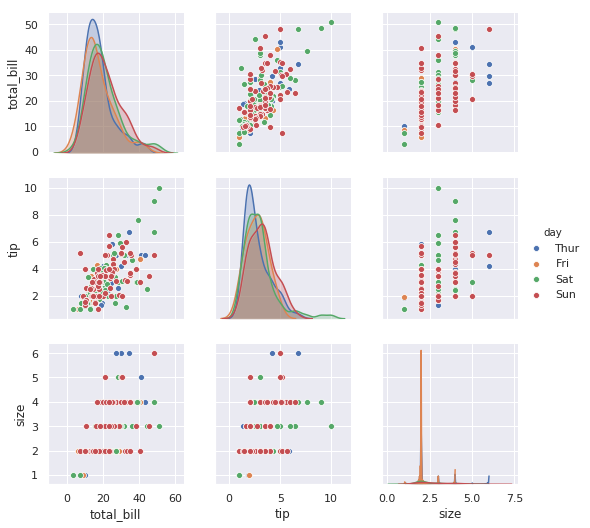

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
sns.pairplot(tips, hue='day')

In [20]:
df = tips.groupby('day').mean()
df

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


In [21]:
df.index

CategoricalIndex(['Thur', 'Fri', 'Sat', 'Sun'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, name='day', dtype='category')

In [22]:
df.reset_index(inplace=True)

In [23]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [24]:
df = tips.groupby(['smoker', 'time']).mean()
df

total_bill       tip      size
smoker time                                  
Yes    Lunch    17.399130  2.834348  2.217391
       Dinner   21.859429  3.066000  2.471429
No     Lunch    17.050889  2.673778  2.511111
       Dinner   20.095660  3.126887  2.735849

In [25]:
df.index

MultiIndex([('Yes',  'Lunch'),
            ('Yes', 'Dinner'),
            ( 'No',  'Lunch'),
            ( 'No', 'Dinner')],
           names=['smoker', 'time'])

In [26]:
tips.groupby(['smoker', 'time']).size()

smoker  time  
Yes     Lunch      23
        Dinner     70
No      Lunch      45
        Dinner    106
dtype: int64

In [27]:
df.swaplevel()

,,total_bill,tip,size
time,smoker,,,
Lunch,Yes,17.399130,2.834348,2.217391
Dinner,Yes,21.859429,3.066000,2.471429
Lunch,No,17.050889,2.673778,2.511111
Dinner,No,20.095660,3.126887,2.735849


In [28]:
df.unstack()

total_bill                  tip                size          
time        Lunch     Dinner     Lunch    Dinner     Lunch    Dinner
smoker                                                              
Yes     17.399130  21.859429  2.834348  3.066000  2.217391  2.471429
No      17.050889  20.095660  2.673778  3.126887  2.511111  2.735849

In [29]:
df.unstack(level=0)

total_bill                  tip                size          
smoker        Yes         No       Yes        No       Yes        No
time                                                                
Lunch   17.399130  17.050889  2.834348  2.673778  2.217391  2.511111
Dinner  21.859429  20.095660  3.066000  3.126887  2.471429  2.735849

YouTube [Tutorial](https://www.youtube.com/watch?v=tcRGa2soc-c)

In [30]:
stocks = pd.read_csv('http://bit.ly/smallstocks')

In [31]:
stocks.head()

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT


In [32]:
print(stocks.shape)

(9, 4)


In [33]:
ser = stocks.groupby(['Symbol','Date']).Close.mean()
ser

Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
        2016-10-05    113.05
CSCO    2016-10-03     31.50
        2016-10-04     31.35
        2016-10-05     31.59
MSFT    2016-10-03     57.42
        2016-10-04     57.24
        2016-10-05     57.64
Name: Close, dtype: float64

In [34]:
ser.unstack()

Date,2016-10-03,2016-10-04,2016-10-05
Symbol,,,
AAPL,112.52,113.00,113.05
CSCO,31.50,31.35,31.59
MSFT,57.42,57.24,57.64


Pivot_table will do the same thing:

In [35]:
stocks.pivot_table(values='Close', index='Symbol', columns='Date')

Date,2016-10-03,2016-10-04,2016-10-05
Symbol,,,
AAPL,112.52,113.00,113.05
CSCO,31.50,31.35,31.59
MSFT,57.42,57.24,57.64


In [36]:
stocks.groupby('Symbol').Close.mean()

Symbol
AAPL    112.856667
CSCO     31.480000
MSFT     57.433333
Name: Close, dtype: float64

In [37]:
stocks.set_index(['Symbol', 'Date'], inplace=True)
stocks

,,Close,Volume
Symbol,Date,,
CSCO,2016-10-03,31.50,14070500
AAPL,2016-10-03,112.52,21701800
MSFT,2016-10-03,57.42,19189500
AAPL,2016-10-04,113.00,29736800
MSFT,2016-10-04,57.24,20085900
CSCO,2016-10-04,31.35,18460400
MSFT,2016-10-05,57.64,16726400
CSCO,2016-10-05,31.59,11808600
AAPL,2016-10-05,113.05,21453100


In [38]:
stocks.sort_index(inplace=True)
stocks

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
       2016-10-05  113.05  21453100
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
       2016-10-05   31.59  11808600
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900
       2016-10-05   57.64  16726400

Selection from the multiindex df:

In [39]:
stocks.loc[('AAPL', '2016-10-05'), :]

Close          113.05
Volume    21453100.00
Name: (AAPL, 2016-10-05), dtype: float64

In [40]:
stocks.loc[('AAPL', '2016-10-05'), 'Close']

113.05

In [41]:
stocks.loc[(['AAPL','MSFT'], '2016-10-05'), :]

,,Close,Volume
Symbol,Date,,
AAPL,2016-10-05,113.05,21453100
MSFT,2016-10-05,57.64,16726400


In [42]:
close = stocks.loc[(slice(None), ['2016-10-05', '2016-10-03']), "Close"]

In [43]:
volume = stocks.loc[(slice(None), ['2016-10-05', '2016-10-03']), "Volume"]

In [44]:
pd.merge(close, volume, left_index=True, right_index=True)

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-05  113.05  21453100
CSCO   2016-10-03   31.50  14070500
       2016-10-05   31.59  11808600
MSFT   2016-10-03   57.42  19189500
       2016-10-05   57.64  16726400

**Cool post about selecting rows**: https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values

## Filtering for the night glucose

In [45]:
import pandas as pd

Try to filter between 1 a.m  and 6 a.m

In [46]:
cgm_df = check.df
cgm_meta = check.df_metadata
cgm_df

GlucoseValue  \
RegistrationCode ConnectionID Date                                      
-1               1            2013-01-21 14:20:50+02:00          88.0   
                              2013-01-21 14:25:50+02:00          89.0   
                              2013-01-21 14:30:50+02:00          87.0   
                              2013-01-21 14:35:50+02:00          85.0   
                              2013-01-21 14:40:50+02:00          84.0   
...                                                               ...   
9999             27           2013-02-09 19:37:29+02:00          75.0   
                              2013-02-09 19:42:29+02:00          77.0   
                              2013-02-09 19:47:29+02:00          80.0   
                              2013-02-09 19:52:29+02:00          84.0   
                              2013-02-09 19:57:29+02:00          87.0   

                                                             PPGR  
RegistrationCode ConnectionID Date                                 
-1               1            2013-01-21 14:20:50+02:00  0.000000  
                              2013-01-21 14:25:50+02:00  0.000000  
                              2013-01-21 14:30:50+02:00  0.000000  
                              2013-01-21 14:35:50+02:00  0.000000  
                              2013-01-21 14:40:50+02:00  2.583333  
...                                                           ...  
9999             27           2013-02-09 19:37:29+02:00       NaN  
                              2013-02-09 19:42:29+02:00       NaN  
                              2013-02-09 19:47:29+02:00       NaN  
                              2013-02-09 19:52:29+02:00       NaN  
                              2013-02-09 19:57:29+02:00       NaN  

[7764779 rows x 2 columns]

In [47]:
cgm_df.shape

(7764779, 2)

In [48]:
len(cgm_df.index)

7764779

In [49]:
cgm_df.columns

Index(['GlucoseValue', 'PPGR'], dtype='object')

In [50]:
cgm_df.index

MultiIndex([(  '-1',  '1', '2013-01-21 14:20:50+02:00'),
            (  '-1',  '1', '2013-01-21 14:25:50+02:00'),
            (  '-1',  '1', '2013-01-21 14:30:50+02:00'),
            (  '-1',  '1', '2013-01-21 14:35:50+02:00'),
            (  '-1',  '1', '2013-01-21 14:40:50+02:00'),
            (  '-1',  '1', '2013-01-21 14:45:50+02:00'),
            (  '-1',  '1', '2013-01-21 14:50:50+02:00'),
            (  '-1',  '1', '2013-01-21 14:55:50+02:00'),
            (  '-1',  '1', '2013-01-21 15:00:50+02:00'),
            (  '-1',  '1', '2013-01-21 15:05:50+02:00'),
            ...
            ('9999', '27', '2013-02-09 19:12:29+02:00'),
            ('9999', '27', '2013-02-09 19:17:29+02:00'),
            ('9999', '27', '2013-02-09 19:22:29+02:00'),
            ('9999', '27', '2013-02-09 19:27:29+02:00'),
            ('9999', '27', '2013-02-09 19:32:29+02:00'),
            ('9999', '27', '2013-02-09 19:37:29+02:00'),
            ('9999', '27', '2013-02-09 19:42:29+02:00'),
            ('9

In [51]:
cgm_df.loc['9999']

GlucoseValue  PPGR
ConnectionID Date                                         
27           2013-02-04 11:52:25+02:00         101.0   0.0
             2013-02-04 11:57:25+02:00         101.0   0.0
             2013-02-04 12:02:25+02:00         100.0   0.0
             2013-02-04 12:07:25+02:00          99.0   0.0
             2013-02-04 12:12:25+02:00          96.0   0.0
...                                              ...   ...
             2013-02-09 19:37:29+02:00          75.0   NaN
             2013-02-09 19:42:29+02:00          77.0   NaN
             2013-02-09 19:47:29+02:00          80.0   NaN
             2013-02-09 19:52:29+02:00          84.0   NaN
             2013-02-09 19:57:29+02:00          87.0   NaN

[1538 rows x 2 columns]

In [52]:
cgm_df.loc['9999', '27']

,GlucoseValue,PPGR
Date,,
2013-02-04 11:52:25+02:00,101.0,0.0
2013-02-04 11:57:25+02:00,101.0,0.0
2013-02-04 12:02:25+02:00,100.0,0.0
2013-02-04 12:07:25+02:00,99.0,0.0
2013-02-04 12:12:25+02:00,96.0,0.0
...,...,...
2013-02-09 19:37:29+02:00,75.0,NaN
2013-02-09 19:42:29+02:00,77.0,NaN
2013-02-09 19:47:29+02:00,80.0,NaN


In [53]:
my_slice = cgm_df.loc['9999', :, '2013-02-04 11:52:25+02:00':'2013-02-04 19:37:29+02:00']
my_slice

GlucoseValue  \
RegistrationCode ConnectionID Date                                      
9999             27           2013-02-04 11:52:25+02:00         101.0   
                              2013-02-04 11:57:25+02:00         101.0   
                              2013-02-04 12:02:25+02:00         100.0   
                              2013-02-04 12:07:25+02:00          99.0   
                              2013-02-04 12:12:25+02:00          96.0   
...                                                               ...   
                              2013-02-04 19:17:25+02:00          82.0   
                              2013-02-04 19:22:25+02:00          81.0   
                              2013-02-04 19:27:25+02:00          80.0   
                              2013-02-04 19:32:25+02:00          79.0   
                              2013-02-04 19:37:25+02:00          80.0   

                                                              PPGR  
RegistrationCode ConnectionID Date                                  
9999             27           2013-02-04 11:52:25+02:00   0.000000  
                              2013-02-04 11:57:25+02:00   0.000000  
                              2013-02-04 12:02:25+02:00   0.000000  
                              2013-02-04 12:07:25+02:00   0.000000  
                              2013-02-04 12:12:25+02:00   0.000000  
...                                                            ...  
                              2013-02-04 19:17:25+02:00  17.041667  
                              2013-02-04 19:22:25+02:00  19.916667  
                              2013-02-04 19:27:25+02:00  23.000000  
                              2013-02-04 19:32:25+02:00  26.208333  
                              2013-02-04 19:37:25+02:00  25.416667  

[94 rows x 2 columns]

In [54]:
cgm_df.index

MultiIndex([(  '-1',  '1', '2013-01-21 14:20:50+02:00'),
            (  '-1',  '1', '2013-01-21 14:25:50+02:00'),
            (  '-1',  '1', '2013-01-21 14:30:50+02:00'),
            (  '-1',  '1', '2013-01-21 14:35:50+02:00'),
            (  '-1',  '1', '2013-01-21 14:40:50+02:00'),
            (  '-1',  '1', '2013-01-21 14:45:50+02:00'),
            (  '-1',  '1', '2013-01-21 14:50:50+02:00'),
            (  '-1',  '1', '2013-01-21 14:55:50+02:00'),
            (  '-1',  '1', '2013-01-21 15:00:50+02:00'),
            (  '-1',  '1', '2013-01-21 15:05:50+02:00'),
            ...
            ('9999', '27', '2013-02-09 19:12:29+02:00'),
            ('9999', '27', '2013-02-09 19:17:29+02:00'),
            ('9999', '27', '2013-02-09 19:22:29+02:00'),
            ('9999', '27', '2013-02-09 19:27:29+02:00'),
            ('9999', '27', '2013-02-09 19:32:29+02:00'),
            ('9999', '27', '2013-02-09 19:37:29+02:00'),
            ('9999', '27', '2013-02-09 19:42:29+02:00'),
            ('9

In [55]:
cgm_df.loc[(  '-1',  '1', '2013-01-21 14:20:50+02:00')]

GlucoseValue    88.0
PPGR             0.0
Name: (-1, 1, 2013-01-21 14:20:50+02:00), dtype: float64

In [62]:
cgm_df_ri = cgm_df.reset_index()
cgm_df_ri

,RegistrationCode,ConnectionID,Date,GlucoseValue,PPGR
0,-1,1,2013-01-21 14:20:50+02:00,88.0,0.000000
1,-1,1,2013-01-21 14:25:50+02:00,89.0,0.000000
2,-1,1,2013-01-21 14:30:50+02:00,87.0,0.000000
3,-1,1,2013-01-21 14:35:50+02:00,85.0,0.000000
4,-1,1,2013-01-21 14:40:50+02:00,84.0,2.583333
...,...,...,...,...,...
7764774,9999,27,2013-02-09 19:37:29+02:00,75.0,NaN
7764775,9999,27,2013-02-09 19:42:29+02:00,77.0,NaN
7764776,9999,27,2013-02-09 19:47:29+02:00,80.0,NaN
7764777,9999,27,2013-02-09 19:52:29+02:00,84.0,NaN


In [65]:
cgm_df_ri['Hour'] = cgm_df_ri.Date.dt.hour
#cgm_df_ri['Hour'] = cgm_df_ri.index.get_level_values('Date').hour
#cgm_df.loc[(cgm_df_ri.Hour >= 1) & (cgm_df_ri.Hour <=6), :]

cgm_df_ri.set_index('Hour', inplace=True)

In [66]:
cgm_df_ri.sort_index()

,RegistrationCode,ConnectionID,Date,GlucoseValue,PPGR
Hour,,,,,
0,494678,5046,2019-02-17 00:09:00+02:00,89.0,0.000000
0,132178,2367,2018-02-11 00:49:00+02:00,113.0,4.625000
0,2590032,3033,2017-07-14 00:53:00+03:00,159.0,0.000000
0,2590032,3033,2017-07-14 00:48:00+03:00,161.0,0.000000
0,2590032,3033,2017-07-14 00:43:00+03:00,161.0,0.000000
...,...,...,...,...,...
23,112871,848,2014-11-19 23:29:08+02:00,83.0,28.208333
23,112871,848,2014-11-19 23:24:08+02:00,82.0,28.708333
23,10K_3348562343,2560726675,2019-05-10 23:02:00+03:00,95.4,3.600000


In [67]:
cgm_night = cgm_df_ri.loc[list(range(1,7)), :]

In [68]:
cgm_night.reset_index(inplace=True)
cgm_night

,Hour,RegistrationCode,ConnectionID,Date,GlucoseValue,PPGR
0,1,-1,1,2013-01-22 01:00:47+02:00,126.0,NaN
1,1,-1,1,2013-01-22 01:05:47+02:00,105.0,NaN
2,1,-1,1,2013-01-22 01:10:47+02:00,103.0,NaN
3,1,-1,1,2013-01-22 01:15:47+02:00,95.0,NaN
4,1,-1,1,2013-01-22 01:25:47+02:00,86.0,NaN
...,...,...,...,...,...,...
1989709,6,9999,27,2013-02-09 06:37:27+02:00,99.0,0.0
1989710,6,9999,27,2013-02-09 06:42:27+02:00,99.0,0.0
1989711,6,9999,27,2013-02-09 06:47:27+02:00,99.0,0.0
1989712,6,9999,27,2013-02-09 06:52:27+02:00,99.0,0.0


In [70]:
cgm_night = cgm_night.drop(['Hour'], axis=1)

In [71]:
cgm_night

,RegistrationCode,ConnectionID,Date,GlucoseValue,PPGR
0,-1,1,2013-01-22 01:00:47+02:00,126.0,NaN
1,-1,1,2013-01-22 01:05:47+02:00,105.0,NaN
2,-1,1,2013-01-22 01:10:47+02:00,103.0,NaN
3,-1,1,2013-01-22 01:15:47+02:00,95.0,NaN
4,-1,1,2013-01-22 01:25:47+02:00,86.0,NaN
...,...,...,...,...,...
1989709,9999,27,2013-02-09 06:37:27+02:00,99.0,0.0
1989710,9999,27,2013-02-09 06:42:27+02:00,99.0,0.0
1989711,9999,27,2013-02-09 06:47:27+02:00,99.0,0.0
1989712,9999,27,2013-02-09 06:52:27+02:00,99.0,0.0


In [72]:
cgm_night.set_index(['RegistrationCode', 'ConnectionID', 'Date'])

GlucoseValue  PPGR
RegistrationCode ConnectionID Date                                         
-1               1            2013-01-22 01:00:47+02:00         126.0   NaN
                              2013-01-22 01:05:47+02:00         105.0   NaN
                              2013-01-22 01:10:47+02:00         103.0   NaN
                              2013-01-22 01:15:47+02:00          95.0   NaN
                              2013-01-22 01:25:47+02:00          86.0   NaN
...                                                               ...   ...
9999             27           2013-02-09 06:37:27+02:00          99.0   0.0
                              2013-02-09 06:42:27+02:00          99.0   0.0
                              2013-02-09 06:47:27+02:00          99.0   0.0
                              2013-02-09 06:52:27+02:00          99.0   0.0
                              2013-02-09 06:57:27+02:00          99.0   0.0

[1989714 rows x 2 columns]

#### Define a function that will filter the dataframe upon the time

In [76]:
def filter_by_time(df, start, end):
    
    """The function filters the entries upon certain hours of the day.
    The output is a dataframe containing the entries between start and end hour of each day."""
    
    df = df.reset_index()
    df['Hour'] = df.Date.dt.hour
    df = df.set_index('Hour')
    filtered_df = df.loc[list(range(start,end)), :]
    filtered_df = filtered_df.reset_index()
    filtered_df =filtered_df.drop(['Hour'], axis=1)
    
    return filtered_df
    

In [77]:
cgm_df = check.df
test = cgm_df.reset_index()

In [78]:
filter_by_time(cgm_df, 1, 7)

,RegistrationCode,ConnectionID,Date,GlucoseValue,PPGR
0,-1,1,2013-01-22 01:00:47+02:00,126.0,NaN
1,-1,1,2013-01-22 01:05:47+02:00,105.0,NaN
2,-1,1,2013-01-22 01:10:47+02:00,103.0,NaN
3,-1,1,2013-01-22 01:15:47+02:00,95.0,NaN
4,-1,1,2013-01-22 01:25:47+02:00,86.0,NaN
...,...,...,...,...,...
1989709,9999,27,2013-02-09 06:37:27+02:00,99.0,0.0
1989710,9999,27,2013-02-09 06:42:27+02:00,99.0,0.0
1989711,9999,27,2013-02-09 06:47:27+02:00,99.0,0.0
1989712,9999,27,2013-02-09 06:52:27+02:00,99.0,0.0


Dima's function


```python
def process_cgm(self, normalize='start'):
        log_.info('Starting processing...')
        cgm = self.cgm.reset_index(['RegistrationCode', 'ConnectionID'])
        # cgm.index = cgm.index.round('T')
        cgm.index = cgm.index.tz_convert('Asia/Jerusalem')
        cgm = cgm.between_time(self.start, self.end)
        cgm['day'] = cgm.index.date
        cgm['time'] = cgm.index - cgm.index.normalize()
        cgm = cgm.set_index(['RegistrationCode', 'day', 'time'])['GlucoseValue']
        cgm = cgm.sort_index(level=['RegistrationCode', 'day', 'time'])
```        